In [1]:
import numpy as np  
import pandas as pd  
from pandas_datareader import data as wb  
import matplotlib.pyplot as plt  
from scipy.stats import norm
%matplotlib inline

In [2]:
ticker = 'PG' 
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

log_returns = np.log(1 + data.pct_change())

In [3]:
log_returns.tail()

,PG
Date,
2020-05-11,-0.005535
2020-05-12,-0.006613
2020-05-13,-0.005515
2020-05-14,-0.000966
2020-05-15,-0.006081


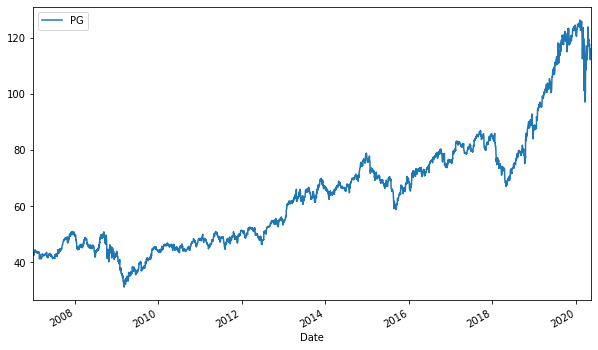

In [4]:
data.plot(figsize=(10, 6));

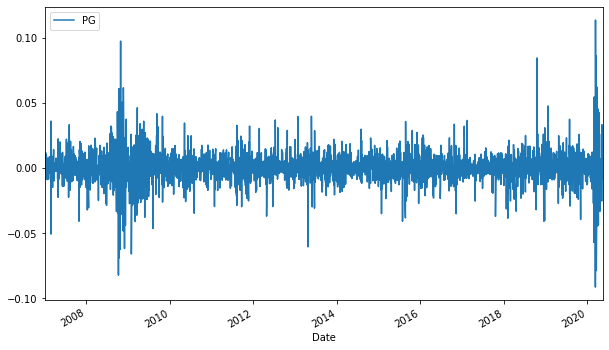

In [5]:
log_returns.plot(figsize = (10, 6))

In [6]:
u = log_returns.mean()
u

PG    0.000286
dtype: float64

In [7]:
var = log_returns.var()
var

PG    0.000143
dtype: float64

In [8]:
drift = u - (0.5 * var)
drift

PG    0.000215
dtype: float64

In [9]:
stdev = log_returns.std()
stdev

PG    0.011953
dtype: float64

𝑑𝑟𝑖𝑓𝑡=𝑢−12⋅𝑣𝑎𝑟

In [10]:
type(drift)

pandas.core.series.Series

In [11]:
type(stdev)

pandas.core.series.Series

In [12]:
np.array(drift)

array([0.00021502])

In [13]:
drift.values

array([0.00021502])

In [14]:
stdev.values

array([0.01195285])

In [15]:
norm.ppf(0.95)

1.6448536269514722

In [16]:
x = np.random.rand(10, 2)
x

array([[0.32451219, 0.92463328],
       [0.87104908, 0.29060998],
       [0.79344083, 0.16526357],
       [0.42227327, 0.86157943],
       [0.27229038, 0.25026209],
       [0.06320633, 0.6680186 ],
       [0.64401067, 0.6203093 ],
       [0.17662188, 0.86407273],
       [0.40187252, 0.56779648],
       [0.48408839, 0.74911255]])

In [17]:
norm.ppf(x)

array([[-0.45511795,  1.43694563],
       [ 1.13136419, -0.55160361],
       [ 0.81841837, -0.97305265],
       [-0.1960813 ,  1.08744284],
       [-0.6059006 , -0.67366522],
       [-1.52840236,  0.43444848],
       [ 0.3692    ,  0.30629322],
       [-0.92831584,  1.09880177],
       [-0.24850327,  0.17076692],
       [-0.03989507,  0.67169969]])

In [18]:
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.46112627, -1.35497101],
       [-0.67261481,  0.57789659],
       [ 1.77138568,  0.39157667],
       [ 1.15428473, -0.96664892],
       [-0.95325158, -0.35705966],
       [ 1.66589288,  0.68750333],
       [-0.93170183,  0.52934832],
       [ 1.50497659,  0.83815316],
       [-0.74755678, -0.44431031],
       [-0.09502008,  1.12356401]])

In [19]:
t_intervals = 1000
iterations = 10

daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals, iterations)))

In [20]:
daily_returns

array([[0.97773082, 1.00006418, 1.00467125, ..., 1.00659133, 0.99298925,
        1.00554763],
       [1.00217151, 1.00981913, 0.98171835, ..., 1.00453112, 1.00592534,
        0.98521793],
       [1.01639859, 0.99788736, 1.00251787, ..., 1.0027049 , 0.9885948 ,
        0.99875975],
       ...,
       [0.99982837, 1.00049597, 1.00369097, ..., 0.99108441, 0.99821781,
        0.98491307],
       [1.0218785 , 1.00263224, 0.98393627, ..., 0.99681223, 0.98453403,
        1.01417508],
       [1.02201855, 1.00064668, 1.00554718, ..., 0.98483304, 0.9833199 ,
        0.98864935]])

***

$$
S_t = S_0 \mathbin{\cdot} daily\_return_t
$$
<br />

$$
S_{t+1} = S_t \mathbin{\cdot} daily\_return_{t+1}
$$

<br /> 
$$...$$
<br />  

$$
S_{t+999} = S_{t+998} \mathbin{\cdot} daily\_return_{t+999}
$$



In [21]:
S0 = data.iloc[-1]
S0v

PG    113.120003
Name: 2020-05-15 00:00:00, dtype: float64

In [22]:
price_list = np.zeros_like(daily_returns)

In [23]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [24]:
price_list[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [25]:
price_list[0] = S0
price_list

array([[113.12000275, 113.12000275, 113.12000275, ..., 113.12000275,
        113.12000275, 113.12000275],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [26]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [27]:
price_list

array([[113.12000275, 113.12000275, 113.12000275, ..., 113.12000275,
        113.12000275, 113.12000275],
       [113.36564393, 114.23074283, 111.0519824 , ..., 113.63256319,
        113.79027716, 111.44785536],
       [115.22468069, 113.98941456, 111.33159686, ..., 113.93992818,
        112.4924759 , 111.30963219],
       ...,
       [148.55597708, 133.27952799, 132.3268442 , ..., 233.9135105 ,
        231.2885053 , 154.24320515],
       [151.80615889, 133.63035104, 130.20118158, ..., 233.16784905,
        227.71140327, 156.42961444],
       [155.14870992, 133.71676739, 130.92343044, ..., 229.63140224,
        223.91315417, 154.65403692]])

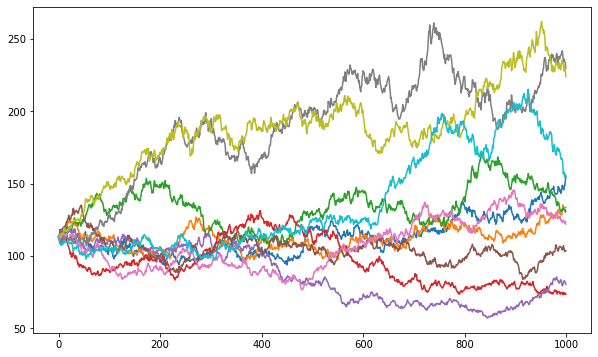

In [28]:
plt.figure(figsize=(10,6))
plt.plot(price_list);